In [1]:
from pdLDS.generate import generateLorenz
import numpy as np
import torch
import matplotlib.pyplot as plt


In [2]:
from pdLDS.generate import generate_ramped_lorenz


Y, X, speed = generate_ramped_lorenz(3)



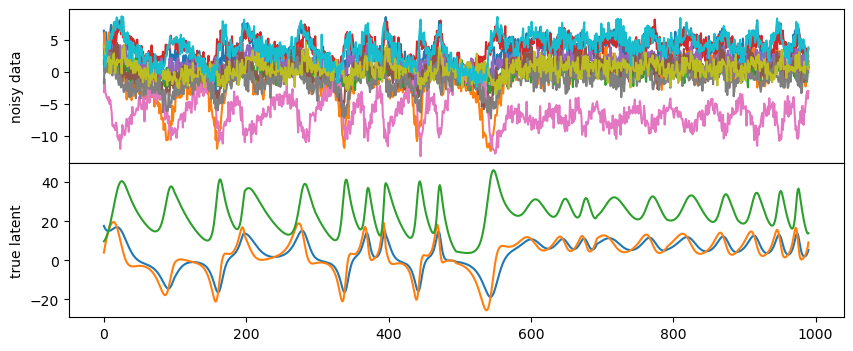

In [3]:
fig, axs = plt.subplots(2,1,figsize=(10,4))
axs[0].plot(Y[0])
axs[0].set_ylabel("noisy data")
# axs[1].plot(true_x)
axs[1].plot(X[0])
axs[1].set_ylabel("true latent")
plt.subplots_adjust(hspace=0)
plt.show()




In [4]:
from pdLDS import pdLDS

In [5]:
emissions_dim, latent_dim, n_dynamic_operators = 10, 3, 4

pdlds = pdLDS(emissions_dim, latent_dim, n_dynamic_operators)

In [7]:
S = 200 # offset window size

pdlds.fit(Y, 
          S, 
          smooth_c=True, 
          emissions_lr = 1e-2, 
          dynamics_lr = 1e-2, 
          train_iters=25, 
          weight_decay=1, 
          init_iters=5,
          init_smoothness=10, 
          xi=100)






Initializing weights with 5 iterations


log pdf: --:   0%|          | 0/5 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

Training with  25 iterations


log pdf: --:   0%|          | 0/25 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

log pdf (-): --:   0%|          | 0/3 [00:00<?, ?it/s]

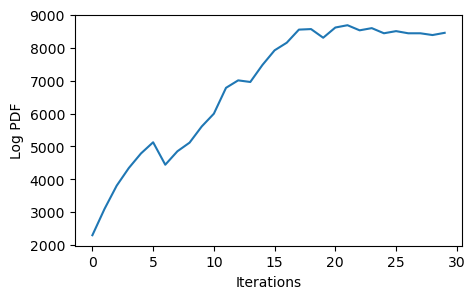

In [8]:
plt.figure(figsize=(5,3))
plt.plot(pdlds.log_pdf_curve)
plt.ylabel("Log PDF")
plt.xlabel("Iterations")
plt.show()

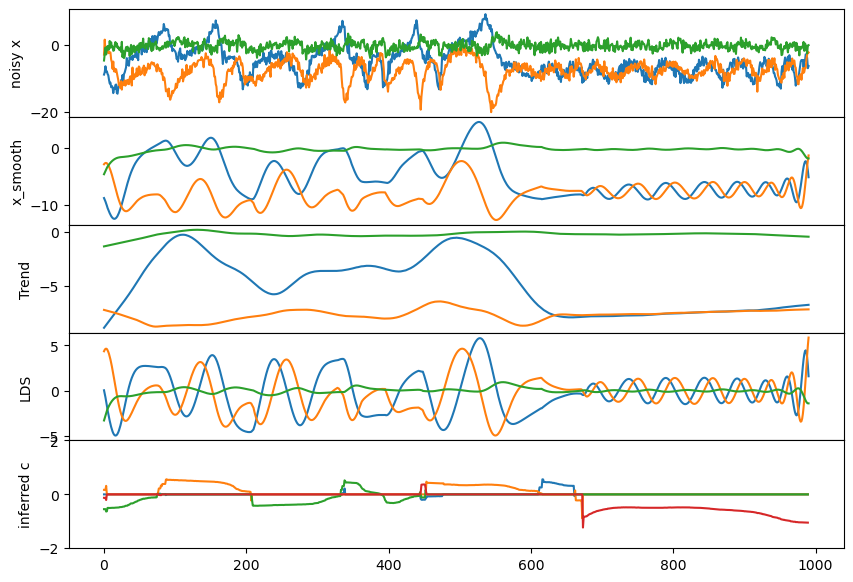

In [9]:
fig, axs = plt.subplots(5,1,figsize=(10,7), sharex=True)

# axs[0].plot(true_x)
axs[0].plot((Y[0] @ torch.linalg.pinv(pdlds.emissions ).T).data)
axs[0].set_ylabel("noisy x")
axs[1].plot(pdlds.offsets[0] + pdlds.latent[0])
axs[1].set_ylabel("x_smooth")
axs[2].plot(pdlds.offsets[0])
axs[2].set_ylabel("Trend")
axs[3].plot(pdlds.latent[0])
axs[3].set_ylabel("LDS")
axs[4].plot(pdlds.coefs[0])
axs[4].set_ylim(-2,2)
axs[4].set_ylabel("inferred c")

plt.subplots_adjust(hspace=0)
plt.show()

In [ ]:
pdlds.infer(Y)

ELBO: --:   0%|          | 0/3 [00:00<?, ?it/s]